## **Feature Engineering On Numerical Data**

# Preparations

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn



In [ ]:
# Load sample dataset used
# Here we use the kaggle data from HW1 clean_kaggle_data.csv for Example 1 & 2
# For Example 3 and 4 we use Housing.csv, which is a small US housing price dataset from Kaggle
# For Example 5 we use Iris.csv, which is a iris dataset that was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems. It can also be found on the UCI Machine Learning Repository.
from google.colab import files
uploaded = files.upload()



In [ ]:
# Read the data
# Specify the path to CSV
csv_file_path = 'clean_kaggle_data.csv'

# Read wanted columns
columns_to_read = ['Q2', 'Q3','Q4','Q8','Q23','Q29']
df = pd.read_csv(csv_file_path, usecols=columns_to_read)

# Rename columns
specific_column_names = {
    'Q2': 'Age',
    'Q3': 'Gender',
    'Q4': 'Country',
    'Q8': 'Education',
    'Q23': 'Job Title',
    'Q29': 'Salary',
}

df.rename(columns=specific_column_names, inplace=True)

#Show first 5 rows
print(df.head(5))

     Age Gender                   Country  \
0  55-59    Man                    France   
1  30-34    Man                   Germany   
2    70+    Man                 Australia   
3  40-44    Man  United States of America   
4  40-44    Man  United States of America   

                                           Education           Job Title  \
0  Some college/university study without earning ...      Data Scientist   
1                                  Bachelor’s degree   Software Engineer   
2                                    Doctoral degree  Research Scientist   
3                                    Doctoral degree  Developer Advocate   
4                                    Master’s degree      Data Scientist   

   Salary  
0   30000  
1  125000  
2  125000  
3  250000  
4  250000  


# Example 1: Scaling

Scaling is one of the most common feature engineering techniques used on numerical data. In fact a lot of ML models can't run properly without proper scaling on the features.
<br>
<br>

Algorithms that rely on distance metrics, such as k-nearest neighbors (K-NN)
and hierarchical clustering, are sensitive to the magnitude of features. If you don't scale your features, those with larger magnitudes can dominate the distance calculations, leading to biased results. Scaling ensures that all features contribute equally to the distance computations.Regularization techniques like L1 (Lasso) and L2 (Ridge) regularization in linear models penalize the magnitude of coefficients. When features are on different scales, the regularization terms may unfairly penalize certain features more than others. Scaling helps ensure that regularization acts fairly across all features.
<br>
<br>



When we choose to scale features, we need to make sure we are using the correct scaler depending on the nature of the features.Common scalers include Min-Max, Z-score and RobustScaler. Note that the Z-score scaler assumes normal distribution of the feature, and is sensitive to outliers, so extra cautions are needed before any scaler is used.

<br>

In the coding example below, we want to scale the salary data from the Kaggle survey and use it as a feature. As HW1 has already shown, the original data is not normally distributed and has outliers. Therefore we choose to use RobustScaler to scale this feature.

<br>

The RobustScaler effectively centers the data around the median and scales it by a measure that's less affected by outliers (IQR). As a result, it ensures that the majority of your data points, which are not outliers, are scaled properly, while outliers have less influence on the scaling.

0    0.065789
1    1.315789
2    1.315789
3    2.960526
4    2.960526
5    2.302632
6    0.986842
7    0.197368
8    0.197368
9    0.197368
Name: Salary_scaled, dtype: float64
0     30000
1    125000
2    125000
3    250000
4    250000
5    200000
6    100000
7     40000
8     40000
9     40000
Name: Salary, dtype: int64


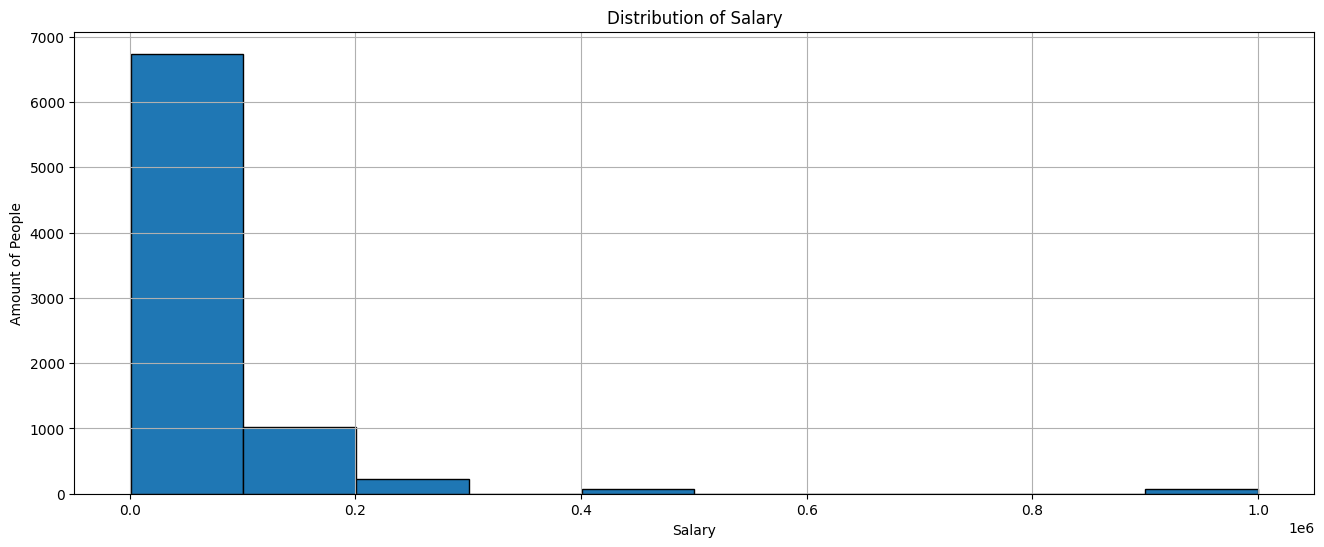

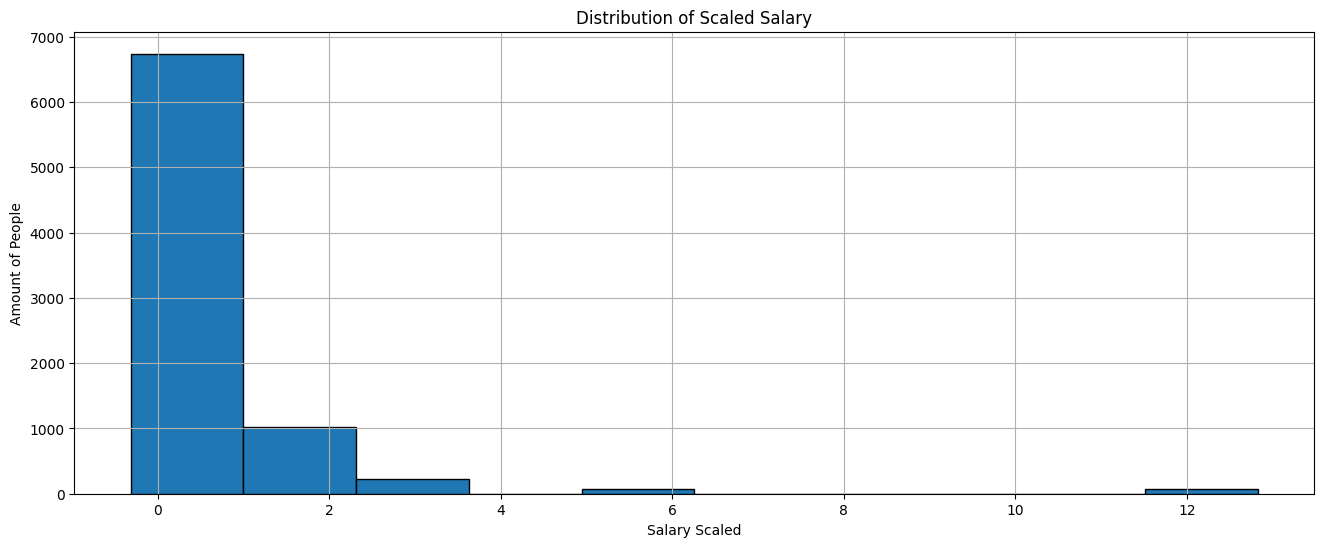

In [ ]:
# Use RobustScaler on the salary data as it does not have normal distribution and has outliers

from sklearn.preprocessing import RobustScaler

# Create a RobustScaler object
scaler = RobustScaler()

# Fit and transform your data
df['Salary_scaled'] = scaler.fit_transform(df[['Salary']])


#Show first 10 rows
print(df['Salary_scaled'].head(10))
print(df['Salary'].head(10))

# Plot the distribution
plt.figure(figsize=(16, 6))
plt.hist(df['Salary'], bins=10, edgecolor='black')
plt.xlabel('Salary')
plt.ylabel('Amount of People')
plt.title('Distribution of Salary')
plt.grid(True)

plt.figure(figsize=(16, 6))
plt.hist(df['Salary_scaled'], bins=10, edgecolor='black')
plt.xlabel('Salary Scaled')
plt.ylabel('Amount of People')
plt.title('Distribution of Scaled Salary')
plt.grid(True)

# Example 2: Binning

Binning, also known as discretization, is a feature engineering technique used to transform continuous numerical features into discrete intervals or "bins."


This can be particularly useful when you want to simplify the data, reduce noise, or make it easier for certain machine learning algorithms to interpret. Binning can be used to capture non-linear relationships between a feature and the target variable. For example, you might bin age into groups (e.g., "child," "adult," "senior") instead of treating it as a continuous variable when predicting a health outcome.Some algorithms, especially decision trees and rule-based models, may perform better with binned features. Binned features can also reduce computation time for certain algorithms because they reduce the number of unique values.

In the code below, we want to bin the salary data into groups and use them as a new feature. Notice how the binning is not ideal as some outliers take up a entire bin in the first attempt. After removing outliers the binned groups are more representative.

0            (1.0, 200800.0]
1            (1.0, 200800.0]
2            (1.0, 200800.0]
3       (200800.0, 400600.0]
4       (200800.0, 400600.0]
                ...         
8131         (1.0, 200800.0]
8132         (1.0, 200800.0]
8133         (1.0, 200800.0]
8134         (1.0, 200800.0]
8135         (1.0, 200800.0]
Name: Salary_bins, Length: 8136, dtype: category
Categories (5, interval[float64, right]): [(1.0, 200800.0] < (200800.0, 400600.0] <
                                           (400600.0, 600400.0] < (600400.0, 800200.0] <
                                           (800200.0, 1000000.0]]


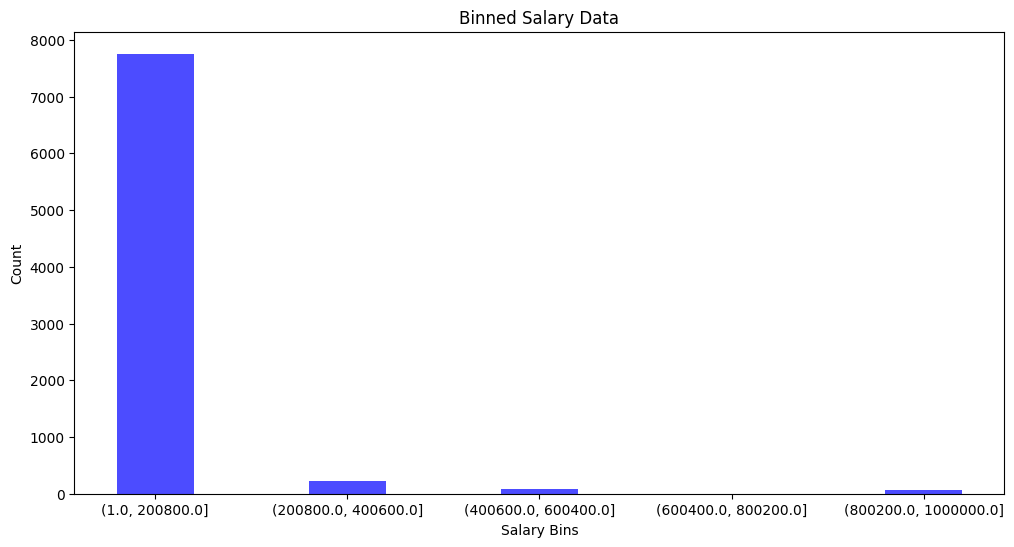

In [ ]:
# Perform equal width binning with 5 bins

df['Salary_bins'] = pd.cut(df['Salary'], bins=5)

print(df['Salary_bins'])

# Count the number of data points in each bin
bin_counts = df['Salary_bins'].value_counts().sort_index()

# Extract the bin labels
bin_labels = [str(bin) for bin in bin_counts.index]

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(bin_labels, bin_counts, width=0.4, align='center', alpha=0.7, color='b')

# Add labels and title
plt.xlabel('Salary Bins')
plt.ylabel('Count')
plt.title('Binned Salary Data')

# Show the plot
plt.show()

0     30000.0
1    125000.0
2    125000.0
3         NaN
4         NaN
5         NaN
6    100000.0
7     40000.0
8     40000.0
9     40000.0
Name: Salary_filterd, dtype: float64
0           (851.0, 30800.0]
1       (120200.0, 150000.0]
2       (120200.0, 150000.0]
3                        NaN
4                        NaN
                ...         
8131    (120200.0, 150000.0]
8132        (851.0, 30800.0]
8133        (851.0, 30800.0]
8134        (851.0, 30800.0]
8135        (851.0, 30800.0]
Name: Salary_bins, Length: 8136, dtype: category
Categories (5, interval[float64, right]): [(851.0, 30800.0] < (30800.0, 60600.0] <
                                           (60600.0, 90400.0] < (90400.0, 120200.0] <
                                           (120200.0, 150000.0]]


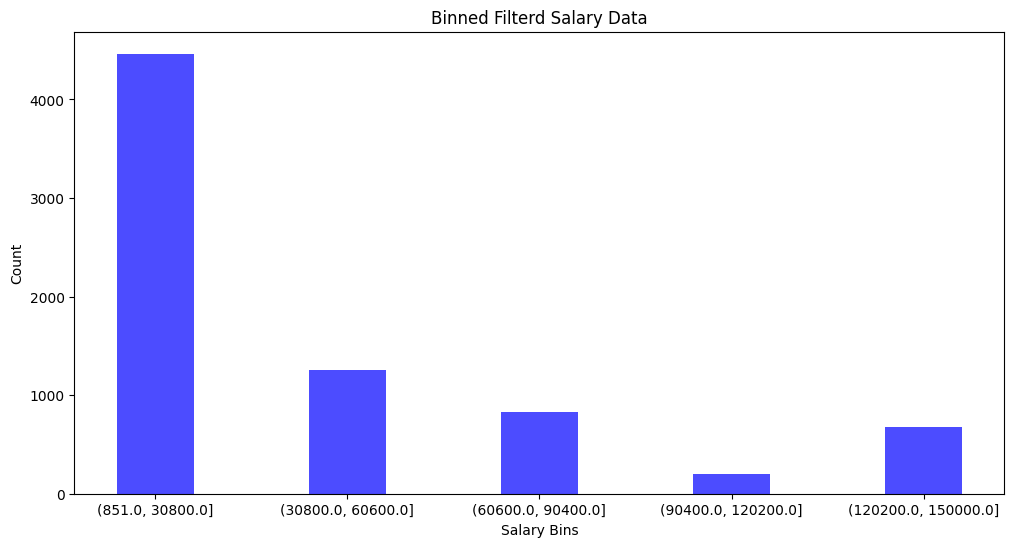

In [ ]:
# Outliers affteted the bins, removing outliers with IQR

IQR_Q1 = df['Salary'].quantile(0.25)
IQR_Q3 = df['Salary'].quantile(0.75)
IQR = IQR_Q3 - IQR_Q1

# Define the lower and upper bounds for outliers
lower_bound = IQR_Q1 - 1.5 * IQR
upper_bound = IQR_Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df['Salary_filterd'] = df['Salary'][(df['Salary'] >= lower_bound) & (df['Salary'] <= upper_bound)]

print(df['Salary_filterd'].head(10))

df['Salary_bins'] = pd.cut(df['Salary_filterd'], bins=5)

print(df['Salary_bins'])

# Count the number of data points in each bin
bin_counts = df['Salary_bins'].value_counts().sort_index()

# Extract the bin labels
bin_labels = [str(bin) for bin in bin_counts.index]

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(bin_labels, bin_counts, width=0.4, align='center', alpha=0.7, color='b')

# Add labels and title
plt.xlabel('Salary Bins')
plt.ylabel('Count')
plt.title('Binned Filterd Salary Data')

# Show the plot
plt.show()

# Example 3: Statistical Aggregations

Statistical aggregations are used to summarize and transform a dataset by calculating statistical measures for groups of data points. Statistical aggregations are often performed using group-by operations, where data is grouped by a specific categorical feature (e.g., a group of customers, products, time periods) and the desired statistical functions are applied within each group. These aggregated statistics can then be used as features for machine learning models to capture patterns, relationships, and summary information in the data.

In this coding example below, let's say we want to predict the living cost of US cities, and we are using housing price as a feature. It might be fine to use the raw price of every single house as a feature, but doing so would cause the model to take in too many unique values and thus becoming computationally too heavy. Instead we can use the mean or median price of each city as a feature.

The code below shows how to calculate those statistical measures. Again, this might look simple, but it is extremely powerful when you are dealing with a huge dataset with a gigantic amount of unique values.

In [ ]:
# Read the housing data
# Specify the path to CSV
csv_file_path = 'Housing.csv'

# Read wanted columns
df = pd.read_csv(csv_file_path)


#Show first 20 rows
print(df.head(20))

       price   area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0   13300000   7420         4          2        3      yes        no       no   
1   12250000   8960         4          4        4      yes        no       no   
2   12250000   9960         3          2        2      yes        no      yes   
3   12215000   7500         4          2        2      yes        no      yes   
4   11410000   7420         4          1        2      yes       yes      yes   
5   10850000   7500         3          3        1      yes        no      yes   
6   10150000   8580         4          3        4      yes        no       no   
7   10150000  16200         5          3        2      yes        no       no   
8    9870000   8100         4          1        2      yes       yes      yes   
9    9800000   5750         3          2        4      yes       yes       no   
10   9800000  13200         3          1        2      yes        no      yes   
11   9681000   6000         

In [ ]:
# Calculate the mean, median, variance and standard deviation
price_mean=df['price'].mean()
print(f"Mean for Price in USD: {price_mean}")

price_median=df['price'].median()
print(f"Median for Price in USD: {price_median}")

price_var=df['price'].var()
print(f"Variance for Price in USD: {price_var}")

price_std=df['price'].std()
print(f"Standard deviation for Price in USD: {price_std}")

Mean for Price in USD: 4766729.247706422
Median for Price in USD: 4340000.0
Variance for Price in USD: 3498544355820.573
Standard deviation for Price in USD: 1870439.6156573922


# Example 4: Feature Interaction

Feature interaction in feature engineering refers to the creation of new features by combining or modifying existing features to capture relationships or interactions between them. This process can help machine learning models understand complex dependencies and patterns in the data otherwise not easily seen in the raw data/features.

Common interactions can be ratio, division, polynomial, cross product. It also requires some domain knowledge on the dataset so that the combination of features makes sense in a realistic way.

In the example below, let's say this time we want to predict if a house is a good-buy (buyers think the price is good). The raw features from the dataset that can be helpful in predicting this are house price and area. Now we don't use those as features, but instead we calculate the ratio of these two, creating price/sqft, which we see very often on realtor sites. This new feature shows the cost-effectiveness of the house price and will serve better as a feature to predict if buyers think the house is worth its price.

In [ ]:
# Calculate the price/sqft and use it as a feature
df['price_per_sqft']=df['price']/df['area']

#Show first 20 rows
print(df['price_per_sqft'].head(20))


0     1792.452830
1     1367.187500
2     1229.919679
3     1628.666667
4     1537.735849
5     1446.666667
6     1182.983683
7      626.543210
8     1218.518519
9     1704.347826
10     742.424242
11    1613.500000
12    1421.374046
13    2640.000000
14    1184.615385
15    1516.666667
16    1378.787879
17    1054.117647
18    1932.608696
19    1379.283489
Name: price_per_sqft, dtype: float64


# Example 5: Dimensionality Reduction


Dimensionality reduction is a feature engineering technique that involves reducing the number of features or variables in your dataset while preserving as much of the important information as possible. High-dimensional datasets, with a large number of features, can pose challenges for machine learning algorithms. Dimensionality reduction can help mitigate these challenges by simplifying the data, reducing computational complexity, and often improving model performance. Two common methods for dimensionality reduction are Principal Component Analysis (PCA) and t-Distributed Stochastic Neighbor Embedding (t-SNE).

In this example below, we want to predict the specie of the iris based on four features: Sepal Length , Sepal Width , Petal Length and Petal Width.

After applying PCA, we can notice that the first 2 PCs contribute to 95.80% of variance within the features, which means if we use only these 2 as features, instead of all 4 features, we should still get a good result. The random forrest classifier gives 0.96 of accuracy on 2-PC, and 1 on all-features, which implies that the 2-PC model is performing well despite that it has less features.

In this case, we manage to get similar model performance with less features, which reduces the computational time. While in our example the dataset is very small so the difference between model runtime is insignificant even when we use 20000 estimators. But when dealing with a large volumn of data, the power of PCA will start to show.

In [ ]:
# Read the data, encode the target species
from sklearn.preprocessing import LabelEncoder

Iris = pd.read_csv("Iris.csv")
X = Iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]

# Create a label encoder
label_encoder = LabelEncoder()

# Encode the categorical column
Iris['Species'] = label_encoder.fit_transform(Iris['Species'])
y=Iris.Species

print(X)
print(y)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]
0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64


In [ ]:
# Dimensionality Reduction with Principal Component Analysis (PCA)

print(X)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)


# Create a PCA object and specify the number of components
n_components = 4  # You can adjust this number based on your needs
pca = PCA(n_components=n_components)

# Fit and transform the data with PCA
principalComponents = pca.fit_transform(X_standardized)

# Create a new DataFrame with the PCA components
X_pca = pd.DataFrame(data=principalComponents, columns=[f"PC{i+1}" for i in range(n_components)])


print(X_pca)

# Calculate the explained variance for each component

explained_variance = pca.explained_variance_

# Calculate the explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate cumulative explained variance
cumulative_explained_variance_ratio = explained_variance_ratio.cumsum()

print("Explained Variance (variance of each component):", explained_variance)
print("Explained Variance Ratio (proportion of total variance):", explained_variance_ratio)
print("Cumulative Explained Variance:")
for i, cumulative_variance in enumerate(cumulative_explained_variance_ratio):
    print(f"Components 1 to {i+1}: {cumulative_variance:.4f}")


# Create a DataFrame to view the loadings of the original features on each PC
loadings_df = pd.DataFrame(pca.components_, columns=X.columns, index=[f'PC{i+1}' for i in range(X_pca.shape[1])])

print(loadings_df)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]
          PC1       PC2       PC3       PC4
0   -2.264542  0.505704 -0.121943 -0.023073
1   -2.086426 -0.655405 -0.227251 -0.103208
2   -2.367950 -0.318477  0.051480 -0.027825
3   -2.304197 -0.575368  0.098860  0.066311
4   -2.38877

In [ ]:
# Run the model with 2 PCs

n_components = 2  # You can adjust this number based on your needs
pca = PCA(n_components=n_components)

# Fit and transform the data with PCA
principalComponents = pca.fit_transform(X_standardized)

# Create a new DataFrame with the PCA components
X_pca = pd.DataFrame(data=principalComponents, columns=[f"PC{i+1}" for i in range(n_components)])


import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

model  = RandomForestClassifier(n_estimators=20000, random_state=42)


# Record the start time
start_time = time.time()

# Train a Random Forrest model

model.fit(X_train, y_train)


# Record the end time
end_time = time.time()

# Calculate and print the runtime
runtime = end_time - start_time
print(f"Model runtime: {runtime:.6f} seconds")

# Evaluate the model
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate the F1 score with the 'micro' averaging strategy
f1_micro = f1_score(y_test, y_pred, average='micro')

# Calculate the F1 score with the 'macro' averaging strategy
f1_macro = f1_score(y_test, y_pred, average='macro')

# Calculate the F1 score with the 'weighted' averaging strategy
f1_weighted = f1_score(y_test, y_pred, average='weighted')

print(f"F1 Micro Score: {f1_micro:.2f}")
print(f"F1 Macro Score: {f1_macro:.2f}")
print(f"F1 Weighted Score: {f1_weighted:.2f}")


Model runtime: 31.407281 seconds
Accuracy: 0.96
F1 Micro Score: 0.96
F1 Macro Score: 0.95
F1 Weighted Score: 0.96


In [ ]:
# Run the model with every features

del X_train, X_test, y_train, y_test
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.3, random_state=42)


# Record the start time
start_time = time.time()

# Train a Random Forrest model

model.fit(X_train, y_train)


# Record the end time
end_time = time.time()

# Calculate and print the runtime
runtime = end_time - start_time
print(f"Model runtime: {runtime:.6f} seconds")

# Evaluate the model
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate the F1 score with the 'micro' averaging strategy
f1_micro = f1_score(y_test, y_pred, average='micro')

# Calculate the F1 score with the 'macro' averaging strategy
f1_macro = f1_score(y_test, y_pred, average='macro')

# Calculate the F1 score with the 'weighted' averaging strategy
f1_weighted = f1_score(y_test, y_pred, average='weighted')

print(f"F1 Micro Score: {f1_micro:.2f}")
print(f"F1 Macro Score: {f1_macro:.2f}")
print(f"F1 Weighted Score: {f1_weighted:.2f}")


Model runtime: 33.785861 seconds
Accuracy: 1.00
F1 Micro Score: 1.00
F1 Macro Score: 1.00
F1 Weighted Score: 1.00
